In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pandas_profiling as pp

from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.impute import SimpleImputer

In [2]:
filename='2021_LoL_esports_match_data_from_OraclesElixir_20221108.csv'
data=pd.read_csv(filename)

data.head()



,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,118.0,748.0,-56.0,-4.0,2.0,0.0,1.0,0.0,1.0,1.0
1,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,84.0,2120.0,3405.0,62.0,3.0,2.0,0.0,2.0,0.0,3.0
2,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,143.0,1578.0,354.0,15.0,2.0,3.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,120.0,124.0,102.0,10.0,0.0,4.0,2.0,1.0,1.0,2.0
4,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,25.0,448.0,450.0,3.0,1.0,4.0,0.0,0.0,2.0,2.0


In [3]:
df=data[['goldat15','xpat15','csat15','killsat15','barons']].copy()

df.dropna(axis=0,how='any',inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38182 entries, 10 to 150263
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   goldat15   38182 non-null  float64
 1   xpat15     38182 non-null  float64
 2   csat15     38182 non-null  float64
 3   killsat15  38182 non-null  float64
 4   barons     38182 non-null  float64
dtypes: float64(5)
memory usage: 1.7 MB


In [4]:
#cleaning the data


#Checking for any missing data type and values

#df.info()
#num_vars = df.columns[df.dtypes != 'object']
#cat_vars = df.columns[df.dtypes == 'object']

#print(num_vars)
#print(cat_vars)
#df[num_vars].isnull().sum().sort_values(ascending =False)/len(df)


#checking if the columns that are relatable to my hypothesis are as bad in missing data
#print(df['xpdiffat15'].isnull().sum()/len(df))
#print(df['golddiffat15'].isnull().sum()/len(df))
#print(df['killsat15'].isnull().sum()/len(df))
#print(df['csdiffat15'].isnull().sum()/len(df))
#print(df['barons'].isnull().sum()/len(df))
#print(df['opp_barons'].isnull().sum()/len(df))
#print(df['xpat15'].isnull().sum()/len(df))
#print(df['opp_xpat15'].isnull().sum()/len(df))
#print(df['goldat15'].isnull().sum()/len(df))
#print(df['opp_goldat15'].isnull().sum()/len(df))
#print(df['opp_killsat15'].isnull().sum()/len(df))
#print(df['csat15'].isnull().sum()/len(df))
#print(df['opp_csat15'].isnull().sum()/len(df))


In [5]:

#drop_cols=['gameid','datacompleteness','url','league','split','date',
#        'side','position','playername','playerid','teamname','teamid',
 #   'champion','ban1','ban2','ban2','ban3','ban4','ban5','year','playoffs','game',
  #      'patch','participantid','gamelength','result','kills','deaths','assists','doublekills'
   #     ,'triplekills','quadrakills','pentakills','firstblood','firstbloodassist',
    #    'firstbloodvictim','teamkills','teamdeaths','firstbloodkill','team kpm','ckpm','firstdragon',
#        'dragons','opp_dragons','elementaldrakes','opp_elementaldrakes','infernals',
#     'mountains','clouds','oceans','chemtechs','hextechs','dragons (type unknown)',
#     'elders','opp_elders','firstherald','heralds','opp_heralds','firsttower','towers','opp_towers',
#     'firstmidtower','firsttothreetowers', 'turretplates','opp_turretplates','inhibitors','opp_inhibitors'
#      ,'damagetochampions','dpm','damageshare','damagetakenperminute','damagemitigatedperminute','wardsplaced',
#     'wpm','controlwardsbought','wardskilled','wcpm','visionscore','vspm','totalgold','earnedgold','earned gpm',
#      'earnedgoldshare','goldspent','gspd','total cs','minionkills','monsterkills','monsterkillsownjungle','monsterkillsenemyjungle','cspm',
#     'firstbaron','goldat10','xpat10','csat10','opp_goldat10','opp_xpat10','opp_csat10','assistsat10','deathsat10','opp_killsat10','opp_assistsat10',
#      'golddiffat10','xpdiffat10','csdiffat10','killsat10','opp_deathsat10','assistsat15','deathsat15','opp_assistsat15','opp_deathsat15',
#        'opp_barons','opp_goldat15','opp_xpat15','opp_csat15','opp_killsat15']

#data=df.drop(drop_cols,axis=1)
#data['barons']=data['barons'].fillna(0)
#imputer.fit(data)

#data.dropna(subset=['goldat15'],inplace=True)
#data.dropna(subset=['xpat15'],inplace=True)
#data.dropna(subset=['csat15'],inplace=True)
#data.dropna(subset=['golddiffat15'],inplace=True)
#data.dropna(subset=['xpdiffat15'],inplace=True)
#data.dropna(subset=['csdiffat15'],inplace=True)
#data.dropna(subset=['killsat15'],inplace=True)

#print(data.head())
#data.info()



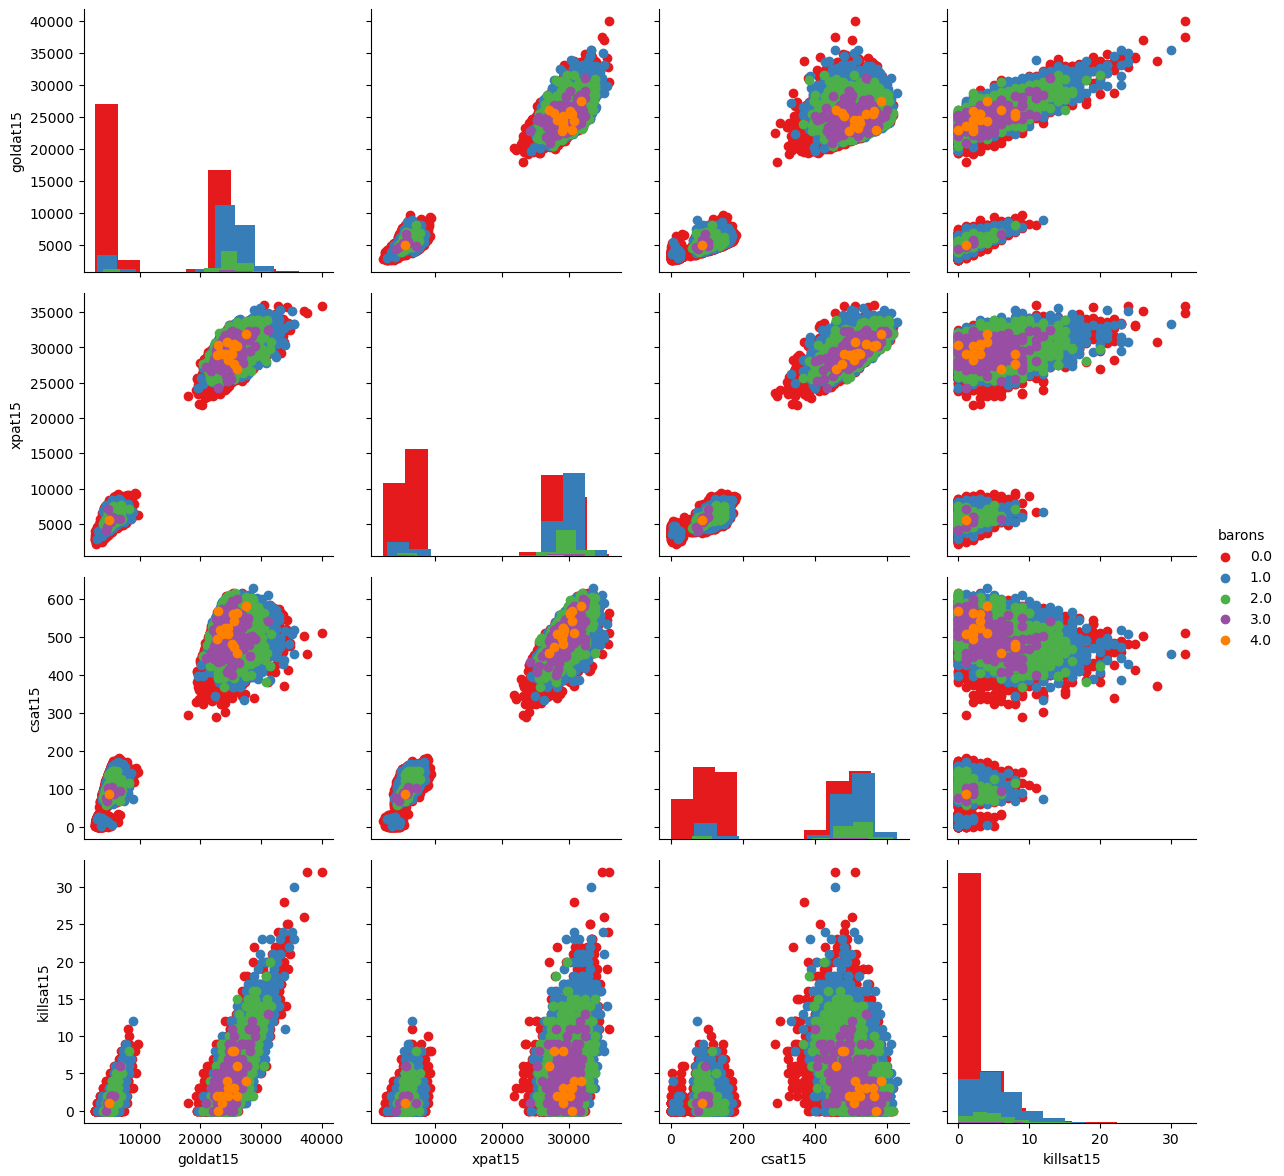

In [6]:
#checking relationship between the 4 features and baron
g = sns.PairGrid(data=df, vars=['goldat15','xpat15','csat15','killsat15'],
             hue='barons',height=3,palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()



In [7]:
#either use linear regression or logistic regression 
#for 1 baron for the 6 linearly correlated features 

In [8]:

#df1=data[['golddiffat15','xpdiffat15','csdiffat15','killsat15','barons']].copy()
#df1.dropna(inplace=True)

#j = sns.PairGrid(data=df1, vars=['golddiffat15','xpdiffat15','csdiffat15','killsat15'],
#             hue='barons',height=3,palette='Set1')
#j.map_diag(plt.hist)
#j.map_offdiag(plt.scatter)
#j.add_legend()
#plt.show()

In [44]:
#splitting dataset 
feature_cols=['golddiffat15','xpdiffat15','csdiffat15','killsat15']
X=df.drop(['barons'],axis=1)
X=X.dropna(axis=0,how='any')
y=df[['barons']]
y=y.dropna(axis=0,how='any')

print(X)

        goldat15   xpat15  csat15  killsat15
10       28027.0  33329.0   576.0        8.0
11       23009.0  29074.0   490.0        3.0
22       24592.0  29844.0   517.0        3.0
23       24019.0  31723.0   566.0        2.0
34       23373.0  27624.0   474.0        3.0
...          ...      ...     ...        ...
150259    5109.0   6920.0   127.0        1.0
150260    7351.0   5842.0   149.0        2.0
150261    3480.0   3333.0    22.0        0.0
150262   26087.0  29426.0   537.0        5.0
150263   25960.0  28646.0   529.0        4.0

[38182 rows x 4 columns]


In [56]:

X_train,X_test,y_train,y_test=train_test_split(y,X,test_size=0.3)


tree=DecisionTreeClassifier(criterion='gini')
model=tree.fit(X_train,y_train)

y_pred=model.predict(y_test)



/Users/mohammed/opt/anaconda3/envs/sports/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- csat15
- goldat15
- killsat15
- xpat15
Feature names seen at fit time, yet now missing:
- barons

  warnings.warn(message, FutureWarning)


ValueError: X has 4 features, but DecisionTreeClassifier is expecting 1 features as input.